# 📊 Step 1: Data Exploration and Analysis
## Sepsis Prediction Project - Comprehensive EDA

---

### 🎯 **Objectives**
- **Primary Goal**: Understand the structure and patterns in sepsis prediction dataset
- **Data Quality Assessment**: Identify missing values, outliers, and data inconsistencies
- **Pattern Discovery**: Uncover temporal trends and sepsis-related biomarkers
- **Feature Insights**: Determine most informative variables for prediction

---

### 📋 **Dataset Overview**
| **Attribute** | **Details** |
|---------------|-------------|
| **Source** | Training Set A from Sepsis Prediction Challenge |
| **Format** | PSV (Pipe-separated values) files |
| **Structure** | Time-series data with hourly measurements |
| **Target Variable** | SepsisLabel (0: no sepsis, 1: sepsis onset) |
| **Patient Records** | Individual files per patient (p000001.psv to p040000.psv) |

---

### 🔬 **Clinical Features Categories**

#### **Vital Signs** 📈
- **HR** (Heart Rate): Cardiac rhythm indicator
- **O2Sat** (Oxygen Saturation): Respiratory function
- **Temp** (Temperature): Inflammatory response marker
- **SBP/DBP** (Blood Pressure): Cardiovascular status
- **MAP** (Mean Arterial Pressure): Perfusion indicator
- **Resp** (Respiratory Rate): Breathing pattern

#### **Laboratory Values** 🧪
- **AST, BUN, Alkalinephos**: Liver and kidney function
- **Calcium, Chloride, Creatinine**: Electrolyte balance
- **Glucose, Lactate**: Metabolic indicators
- **Magnesium, Phosphate**: Mineral status
- **Potassium, TroponinI**: Cardiac markers
- **Hct, Hgb, WBC**: Hematological parameters

#### **Blood Gas Analysis** 🫁
- **EtCO2, BaseExcess, HCO3**: Acid-base balance
- **FiO2, pH, PaCO2, SaO2**: Respiratory gas exchange

#### **Demographics & Clinical Context** 👥
- **Age, Gender**: Patient characteristics
- **Unit1, Unit2**: Hospital unit indicators
- **HospAdmTime**: Time since hospital admission
- **ICULOS**: ICU length of stay

---

### 📈 **Analysis Methodology**
1. **Data Loading & Structure Analysis**
2. **Missing Value Assessment**
3. **Distribution Analysis** (Univariate & Bivariate)
4. **Temporal Pattern Recognition**
5. **Sepsis vs Non-Sepsis Comparison**
6. **Feature Correlation Analysis**
7. **Clinical Insight Generation**

---

### 💡 **Key Research Questions**
- Which vital signs show the earliest sepsis indicators?
- How do laboratory values change before sepsis onset?
- What are the temporal patterns in sepsis development?
- Which features have the highest predictive value?

---

### 📊 **Expected Outcomes**
- Comprehensive data quality report
- Feature importance ranking
- Temporal trend visualizations
- Clinical insights for model development
- Data preprocessing recommendations

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import os
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 🛠️ Environment Setup and Library Imports

Setting up the analysis environment with essential libraries for data exploration, visualization, and statistical analysis.

In [2]:
# Define data path
data_path = r"C:\Users\sachi\Desktop\Sepsis STFT\data\raw\training_setA (1)"

# Get list of all PSV files
psv_files = glob.glob(os.path.join(data_path, "*.psv"))
print(f"Found {len(psv_files)} PSV files")

# Display first few filenames
print("\nFirst 10 files:")
for i, file in enumerate(psv_files[:10]):
    print(f"{i+1:2d}. {os.path.basename(file)}")

Found 20336 PSV files

First 10 files:
 1. p000001.psv
 2. p000002.psv
 3. p000003.psv
 4. p000004.psv
 5. p000005.psv
 6. p000006.psv
 7. p000007.psv
 8. p000008.psv
 9. p000009.psv
10. p000010.psv


## 📂 Data Loading and Initial Inspection

Loading the sepsis prediction dataset and performing initial structural analysis to understand the data format and organization.

In [3]:
# Function to load and process PSV files
def load_psv_file(filepath):
    """Load a single PSV file and add patient ID"""
    try:
        df = pd.read_csv(filepath, sep='|')
        # Extract patient ID from filename
        patient_id = os.path.basename(filepath).replace('.psv', '')
        df['PatientID'] = patient_id
        return df
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None

# Load first few files to examine structure
print("Loading sample files...")
sample_data = []
for file in psv_files[:5]:
    df = load_psv_file(file)
    if df is not None:
        sample_data.append(df)

# Examine the first file
if sample_data:
    print(f"\nFirst file shape: {sample_data[0].shape}")
    print(f"Columns: {list(sample_data[0].columns)}")
    print(f"\nFirst few rows:")
    display(sample_data[0].head())

Loading sample files...

First file shape: (54, 42)
Columns: ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'PatientID']

First few rows:


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,PatientID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,p000001
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,p000001
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,p000001
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,p000001
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,p000001


In [4]:
# Load a subset of data for initial exploration (first 100 patients)
print("Loading subset of data for exploration...")
subset_files = psv_files[:100]
data_list = []

for i, file in enumerate(subset_files):
    if i % 20 == 0:
        print(f"Loading file {i+1}/{len(subset_files)}")
    
    df = load_psv_file(file)
    if df is not None:
        data_list.append(df)

# Combine all data
if data_list:
    combined_data = pd.concat(data_list, ignore_index=True)
    print(f"\nCombined dataset shape: {combined_data.shape}")
    print(f"Unique patients: {combined_data['PatientID'].nunique()}")
    print(f"Total hours of data: {len(combined_data)}")
else:
    print("No data loaded!")

Loading subset of data for exploration...
Loading file 1/100
Loading file 21/100
Loading file 41/100
Loading file 61/100
Loading file 81/100

Combined dataset shape: (3704, 42)
Unique patients: 100
Total hours of data: 3704


## 📊 Data Quality Assessment

Comprehensive analysis of data completeness, missing values, and overall dataset quality for informed preprocessing decisions.

In [5]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {combined_data.shape}")
print(f"Memory usage: {combined_data.memory_usage().sum() / 1024**2:.2f} MB")

print("\n=== DATA TYPES ===")
print(combined_data.dtypes.value_counts())

print("\n=== BASIC STATISTICS ===")
display(combined_data.describe())

=== DATASET OVERVIEW ===
Shape: (3704, 42)
Memory usage: 1.19 MB

=== DATA TYPES ===
float64    38
int64       3
object      1
Name: count, dtype: int64

=== BASIC STATISTICS ===


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,3402.000000,3236.000000,1229.000000,3058.000000,3315.000000,1719.000000,3319.000000,0.0,371.000000,307.000000,...,279.000000,25.000000,246.000000,3704.000000,3704.000000,2102.000000,2102.000000,3704.000000,3704.000000,3704.000000
mean,89.689888,97.281057,37.077917,121.685033,79.482365,61.899651,19.158406,NaN,-0.291105,23.845277,...,11.379570,290.800000,232.778455,58.578958,0.609881,0.588487,0.411513,-58.233232,31.183045,0.036447
std,17.550979,2.426899,0.873990,20.495106,14.057671,13.601167,5.630220,NaN,5.410465,4.821961,...,4.819965,177.704167,138.838420,17.308745,0.487843,0.492225,0.492225,157.539127,38.108306,0.187425
min,44.500000,79.000000,33.220000,69.000000,20.000000,32.000000,4.000000,NaN,-14.000000,12.000000,...,2.100000,124.000000,26.000000,25.420000,0.000000,0.000000,0.000000,-1195.710000,1.000000,0.000000
25%,76.500000,96.000000,36.500000,106.000000,69.835000,53.000000,15.000000,NaN,-3.000000,21.000000,...,8.000000,183.000000,139.000000,46.350000,0.000000,0.000000,0.000000,-65.910000,11.000000,0.000000
50%,89.000000,98.000000,37.060000,120.000000,78.000000,60.000000,18.000000,NaN,0.000000,23.000000,...,10.600000,220.000000,198.500000,59.340000,1.000000,1.000000,0.000000,-2.160000,21.000000,0.000000
75%,102.000000,99.000000,37.670000,136.000000,88.000000,69.000000,22.000000,NaN,2.000000,26.000000,...,14.000000,332.000000,288.000000,71.100000,1.000000,1.000000,1.000000,-0.030000,36.000000,0.000000
max,155.500000,100.000000,40.500000,220.500000,219.000000,287.000000,55.500000,NaN,24.000000,48.000000,...,27.700000,804.000000,759.000000,87.990000,1.000000,1.000000,1.000000,0.940000,258.000000,1.000000


In [6]:
# Missing value analysis
print("=== MISSING VALUE ANALYSIS ===")
missing_data = combined_data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(combined_data) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})

print("Features with missing values:")
display(missing_df[missing_df['Missing_Count'] > 0])

=== MISSING VALUE ANALYSIS ===
Features with missing values:


,Missing_Count,Missing_Percentage
EtCO2,3704,100.00
Bilirubin_direct,3700,99.89
TroponinI,3700,99.89
Fibrinogen,3679,99.33
Bilirubin_total,3655,98.68
Alkalinephos,3645,98.41
AST,3641,98.30
Lactate,3569,96.36
SaO2,3557,96.03
PTT,3536,95.46


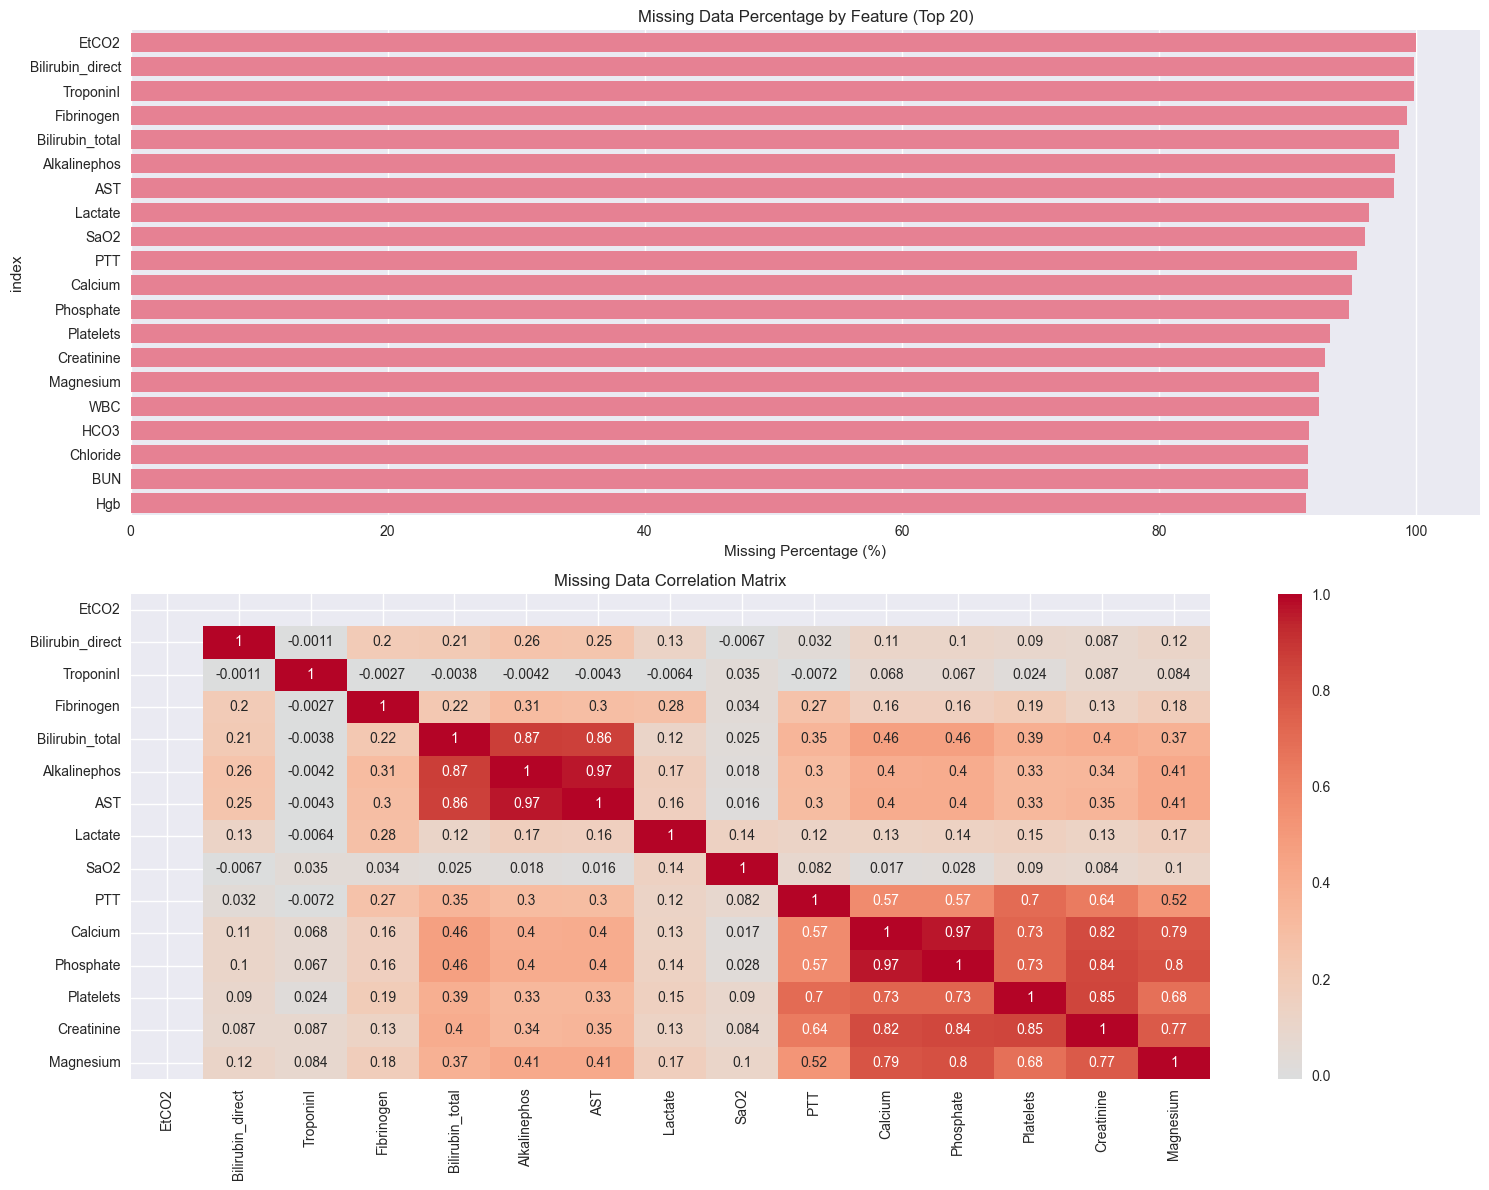

In [7]:
# Visualize missing data pattern
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Missing data heatmap
missing_subset = missing_df[missing_df['Missing_Count'] > 0].head(20)
sns.barplot(data=missing_subset.reset_index(), x='Missing_Percentage', y='index', ax=axes[0])
axes[0].set_title('Missing Data Percentage by Feature (Top 20)')
axes[0].set_xlabel('Missing Percentage (%)')

# Missing data correlation matrix (for features with some missing data)
features_with_missing = missing_df[missing_df['Missing_Count'] > 0].head(15).index.tolist()
missing_corr = combined_data[features_with_missing].isnull().corr()

sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title('Missing Data Correlation Matrix')

plt.tight_layout()
plt.show()

## 📈 Distribution Analysis and Statistical Overview

Understanding the statistical properties and distributions of clinical variables to inform feature engineering and model selection.

In [8]:
# Sepsis label analysis
print("=== SEPSIS LABEL ANALYSIS ===")

# Overall distribution
sepsis_counts = combined_data['SepsisLabel'].value_counts()
sepsis_percent = combined_data['SepsisLabel'].value_counts(normalize=True) * 100

print("Overall Sepsis Distribution:")
for label, count in sepsis_counts.items():
    print(f"  Class {label}: {count:,} ({sepsis_percent[label]:.2f}%)")

# Patient-level analysis
patient_sepsis = combined_data.groupby('PatientID')['SepsisLabel'].agg(['max', 'sum', 'count']).reset_index()
patient_sepsis['has_sepsis'] = patient_sepsis['max']
patient_sepsis['sepsis_hours'] = patient_sepsis['sum']
patient_sepsis['total_hours'] = patient_sepsis['count']

print(f"\nPatient-level Analysis:")
print(f"Total patients: {len(patient_sepsis)}")
print(f"Patients with sepsis: {patient_sepsis['has_sepsis'].sum()} ({patient_sepsis['has_sepsis'].mean()*100:.2f}%)")
print(f"Patients without sepsis: {(patient_sepsis['has_sepsis']==0).sum()} ({(patient_sepsis['has_sepsis']==0).mean()*100:.2f}%)")

display(patient_sepsis.head(10))

=== SEPSIS LABEL ANALYSIS ===
Overall Sepsis Distribution:
  Class 0: 3,569 (96.36%)
  Class 1: 135 (3.64%)

Patient-level Analysis:
Total patients: 100
Patients with sepsis: 14 (14.00%)
Patients without sepsis: 86 (86.00%)


,PatientID,max,sum,count,has_sepsis,sepsis_hours,total_hours
0,p000001,0,0,54,0,0,54
1,p000002,0,0,23,0,0,23
2,p000003,0,0,48,0,0,48
3,p000004,0,0,29,0,0,29
4,p000005,0,0,48,0,0,48
5,p000006,0,0,17,0,0,17
6,p000007,0,0,45,0,0,45
7,p000008,0,0,40,0,0,40
8,p000009,1,10,258,1,10,258
9,p000010,0,0,23,0,0,23


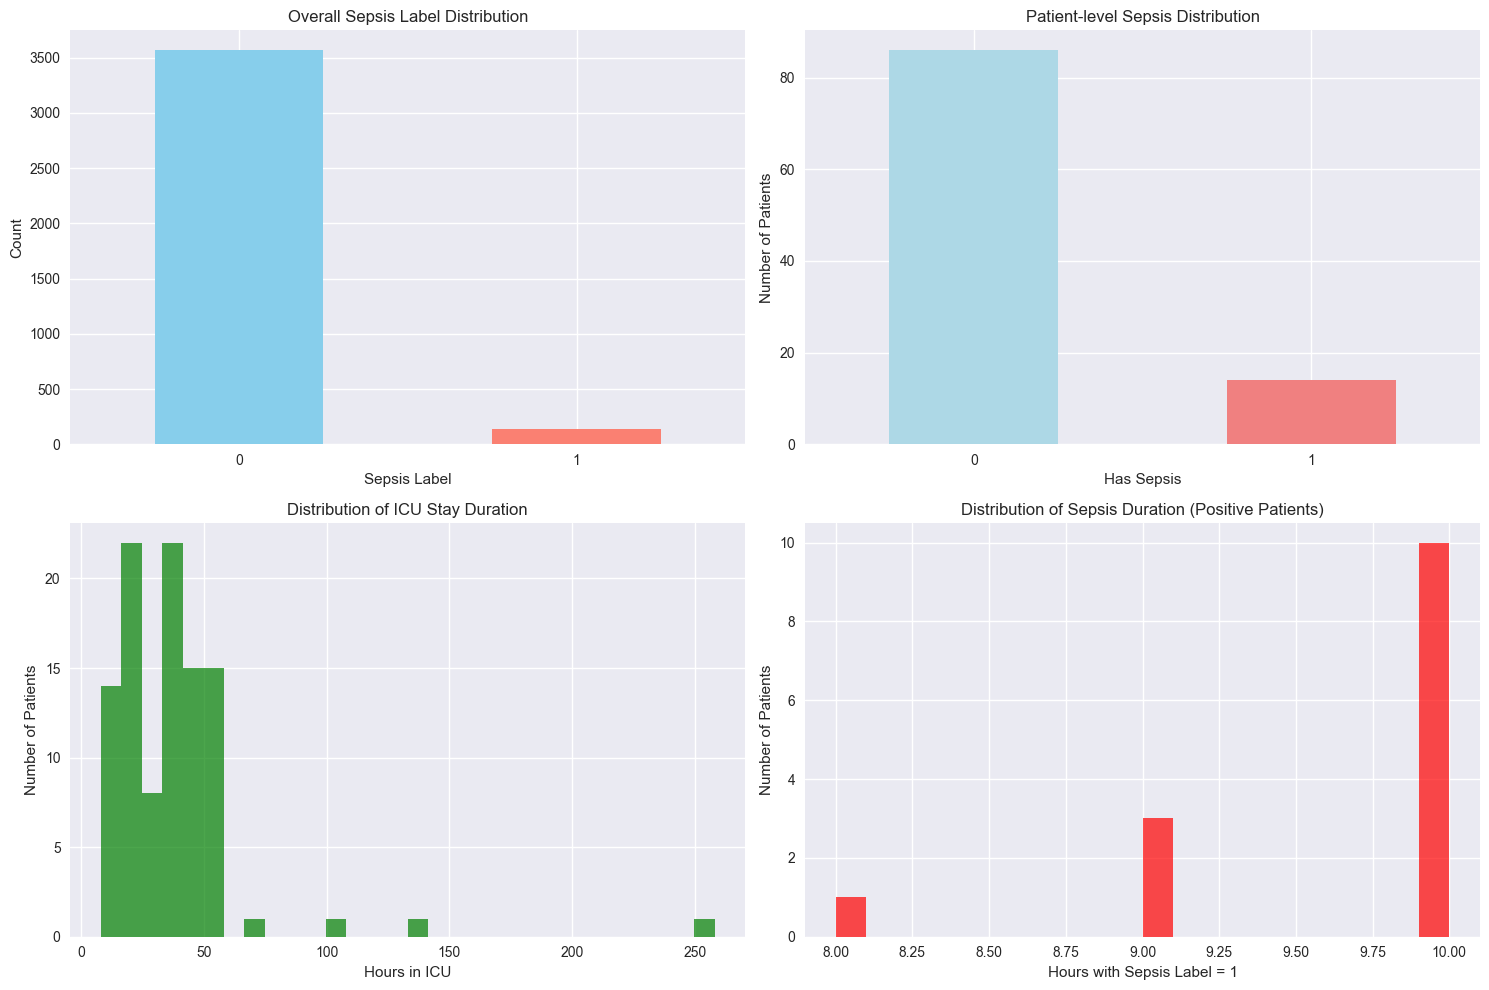

In [9]:
# Visualize sepsis distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall distribution
sepsis_counts.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'salmon'])
axes[0,0].set_title('Overall Sepsis Label Distribution')
axes[0,0].set_xlabel('Sepsis Label')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=0)

# Patient-level distribution
patient_sepsis['has_sepsis'].value_counts().plot(kind='bar', ax=axes[0,1], color=['lightblue', 'lightcoral'])
axes[0,1].set_title('Patient-level Sepsis Distribution')
axes[0,1].set_xlabel('Has Sepsis')
axes[0,1].set_ylabel('Number of Patients')
axes[0,1].tick_params(axis='x', rotation=0)

# Hours in ICU distribution
axes[1,0].hist(patient_sepsis['total_hours'], bins=30, alpha=0.7, color='green')
axes[1,0].set_title('Distribution of ICU Stay Duration')
axes[1,0].set_xlabel('Hours in ICU')
axes[1,0].set_ylabel('Number of Patients')

# Sepsis hours for positive patients
sepsis_patients = patient_sepsis[patient_sepsis['has_sepsis'] == 1]
if len(sepsis_patients) > 0:
    axes[1,1].hist(sepsis_patients['sepsis_hours'], bins=20, alpha=0.7, color='red')
    axes[1,1].set_title('Distribution of Sepsis Duration (Positive Patients)')
    axes[1,1].set_xlabel('Hours with Sepsis Label = 1')
    axes[1,1].set_ylabel('Number of Patients')

plt.tight_layout()
plt.show()

In [10]:
# Vital signs analysis
vital_signs = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp']

print("=== VITAL SIGNS ANALYSIS ===")
for vital in vital_signs:
    if vital in combined_data.columns:
        data = combined_data[vital].dropna()
        print(f"\n{vital}:")
        print(f"  Count: {len(data):,}")
        print(f"  Mean: {data.mean():.2f}")
        print(f"  Std: {data.std():.2f}")
        print(f"  Range: {data.min():.2f} - {data.max():.2f}")
        print(f"  Missing: {combined_data[vital].isnull().sum():,} ({combined_data[vital].isnull().sum()/len(combined_data)*100:.1f}%)")

=== VITAL SIGNS ANALYSIS ===

HR:
  Count: 3,402
  Mean: 89.69
  Std: 17.55
  Range: 44.50 - 155.50
  Missing: 302 (8.2%)

O2Sat:
  Count: 3,236
  Mean: 97.28
  Std: 2.43
  Range: 79.00 - 100.00
  Missing: 468 (12.6%)

Temp:
  Count: 1,229
  Mean: 37.08
  Std: 0.87
  Range: 33.22 - 40.50
  Missing: 2,475 (66.8%)

SBP:
  Count: 3,058
  Mean: 121.69
  Std: 20.50
  Range: 69.00 - 220.50
  Missing: 646 (17.4%)

MAP:
  Count: 3,315
  Mean: 79.48
  Std: 14.06
  Range: 20.00 - 219.00
  Missing: 389 (10.5%)

DBP:
  Count: 1,719
  Mean: 61.90
  Std: 13.60
  Range: 32.00 - 287.00
  Missing: 1,985 (53.6%)

Resp:
  Count: 3,319
  Mean: 19.16
  Std: 5.63
  Range: 4.00 - 55.50
  Missing: 385 (10.4%)


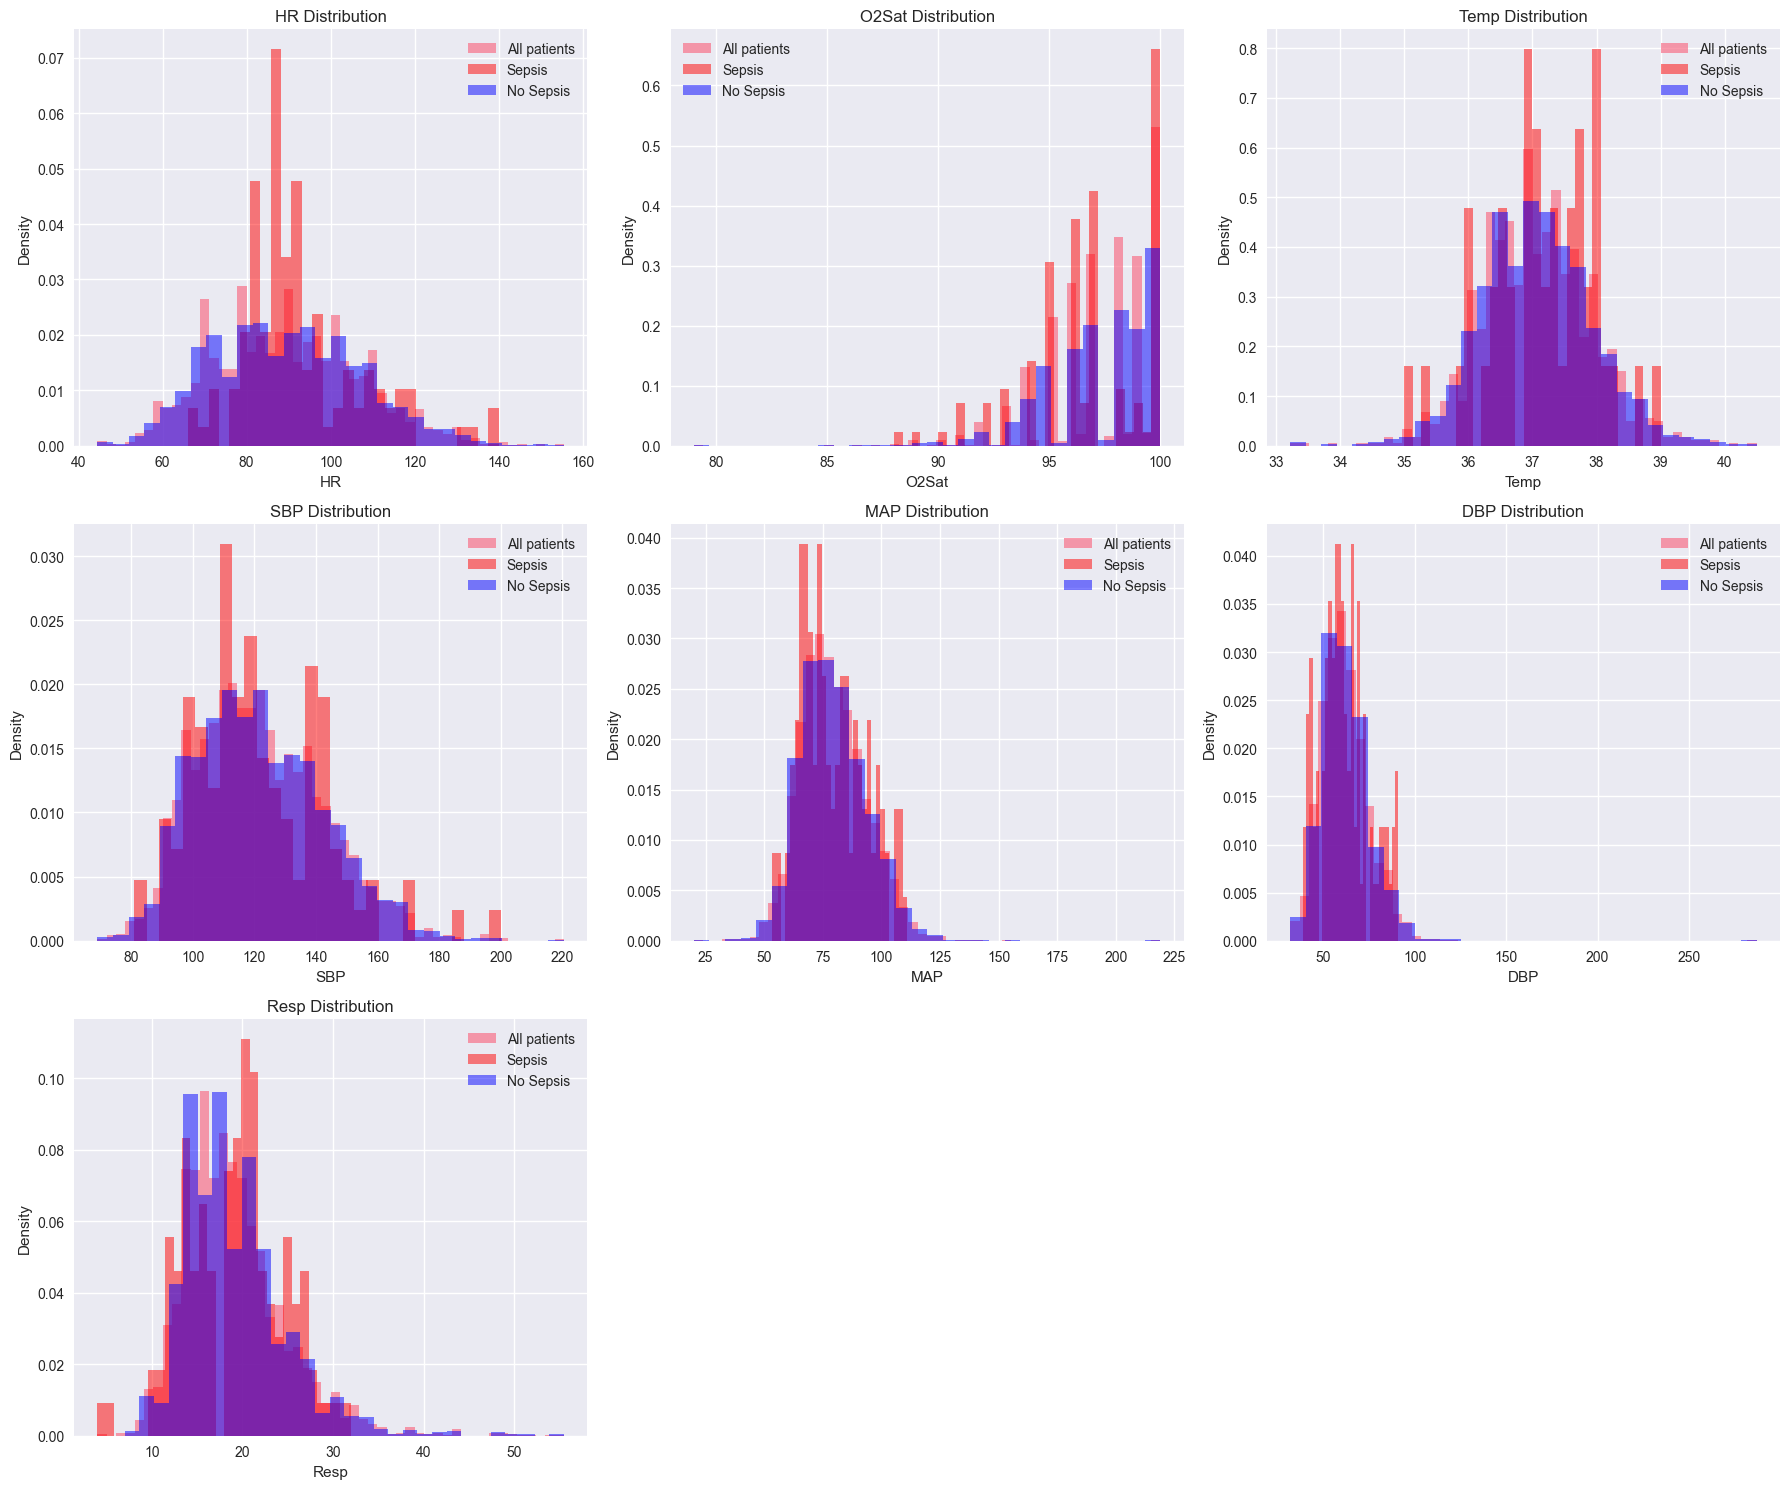

In [11]:
# Visualize vital signs distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, vital in enumerate(vital_signs):
    if vital in combined_data.columns and i < len(axes):
        # Overall distribution
        data = combined_data[vital].dropna()
        axes[i].hist(data, bins=50, alpha=0.7, density=True, label='All patients')
        
        # Sepsis vs non-sepsis
        sepsis_data = combined_data[combined_data['SepsisLabel'] == 1][vital].dropna()
        no_sepsis_data = combined_data[combined_data['SepsisLabel'] == 0][vital].dropna()
        
        if len(sepsis_data) > 0:
            axes[i].hist(sepsis_data, bins=30, alpha=0.5, density=True, label='Sepsis', color='red')
        if len(no_sepsis_data) > 0:
            axes[i].hist(no_sepsis_data, bins=30, alpha=0.5, density=True, label='No Sepsis', color='blue')
        
        axes[i].set_title(f'{vital} Distribution')
        axes[i].set_xlabel(vital)
        axes[i].set_ylabel('Density')
        axes[i].legend()

# Remove empty subplot
if len(vital_signs) < len(axes):
    for i in range(len(vital_signs), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## 🕒 Temporal Pattern Analysis

Analyzing time-series patterns in vital signs and biomarkers to understand sepsis progression and identify early warning indicators.

In [12]:
# Laboratory values analysis
lab_values = ['AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 
              'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 
              'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 
              'WBC', 'Fibrinogen', 'Platelets']

print("=== LABORATORY VALUES ANALYSIS ===")
lab_stats = []

for lab in lab_values:
    if lab in combined_data.columns:
        data = combined_data[lab].dropna()
        if len(data) > 0:
            lab_stats.append({
                'Feature': lab,
                'Count': len(data),
                'Missing_Pct': combined_data[lab].isnull().sum()/len(combined_data)*100,
                'Mean': data.mean(),
                'Std': data.std(),
                'Min': data.min(),
                'Max': data.max(),
                'Q25': data.quantile(0.25),
                'Q50': data.quantile(0.50),
                'Q75': data.quantile(0.75)
            })

lab_stats_df = pd.DataFrame(lab_stats)
display(lab_stats_df)

=== LABORATORY VALUES ANALYSIS ===


,Feature,Count,Missing_Pct,Mean,Std,Min,Max,Q25,Q50,Q75
0,AST,63,98.299136,235.476190,515.334525,8.0,2272.0,22.0,42.00,110.50
1,BUN,312,91.576674,23.166667,19.333370,1.0,107.0,11.0,17.00,27.00
2,Alkalinephos,59,98.407127,121.033898,79.566274,37.0,365.0,70.0,98.00,130.50
3,Calcium,185,95.005400,8.150811,0.798172,5.9,11.1,7.6,8.10,8.60
4,Chloride,311,91.603672,105.977492,5.794002,85.0,123.0,103.0,106.00,110.00
5,Creatinine,263,92.899568,1.539163,1.992301,0.3,10.6,0.6,0.90,1.20
6,Bilirubin_direct,4,99.892009,1.450000,1.096966,0.5,2.4,0.5,1.45,2.40
7,Glucose,443,88.039957,136.765237,49.388846,48.0,346.0,103.0,126.00,158.50
8,Lactate,135,96.355292,1.960741,1.008405,0.7,5.5,1.2,1.70,2.35
9,Magnesium,278,92.494600,2.015827,0.343324,1.1,3.4,1.8,2.00,2.30


In [13]:
# Temporal patterns analysis
print("=== TEMPORAL PATTERNS ANALYSIS ===")

# ICULOS (ICU Length of Stay) analysis
iculos_stats = combined_data.groupby('PatientID')['ICULOS'].agg(['min', 'max', 'count']).reset_index()
iculos_stats['duration'] = iculos_stats['max'] - iculos_stats['min'] + 1

print(f"ICU Length of Stay Statistics:")
print(f"  Average duration: {iculos_stats['duration'].mean():.1f} hours")
print(f"  Median duration: {iculos_stats['duration'].median():.1f} hours")
print(f"  Range: {iculos_stats['duration'].min()} - {iculos_stats['duration'].max()} hours")

# Time to sepsis analysis
sepsis_onset = combined_data[combined_data['SepsisLabel'] == 1].groupby('PatientID')['ICULOS'].min().reset_index()
sepsis_onset.columns = ['PatientID', 'SepsisOnsetHour']

if len(sepsis_onset) > 0:
    print(f"\nSepsis Onset Analysis:")
    print(f"  Average time to sepsis: {sepsis_onset['SepsisOnsetHour'].mean():.1f} hours")
    print(f"  Median time to sepsis: {sepsis_onset['SepsisOnsetHour'].median():.1f} hours")
    print(f"  Range: {sepsis_onset['SepsisOnsetHour'].min()} - {sepsis_onset['SepsisOnsetHour'].max()} hours")

display(iculos_stats.head())
if len(sepsis_onset) > 0:
    display(sepsis_onset.head())

=== TEMPORAL PATTERNS ANALYSIS ===
ICU Length of Stay Statistics:
  Average duration: 37.0 hours
  Median duration: 35.5 hours
  Range: 8 - 258 hours

Sepsis Onset Analysis:
  Average time to sepsis: 46.7 hours
  Median time to sepsis: 19.5 hours
  Range: 1 - 249 hours


,PatientID,min,max,count,duration
0,p000001,1,54,54,54
1,p000002,1,23,23,23
2,p000003,1,48,48,48
3,p000004,1,29,29,29
4,p000005,2,49,48,48


,PatientID,SepsisOnsetHour
0,p000009,249
1,p000011,26
2,p000015,6
3,p000018,126
4,p000022,14


In [14]:
# Demographics analysis
print("=== DEMOGRAPHICS ANALYSIS ===")

# Age analysis
patient_demographics = combined_data.groupby('PatientID').agg({
    'Age': 'first',
    'Gender': 'first',
    'SepsisLabel': 'max'
}).reset_index()

print(f"Age Statistics:")
print(f"  Mean age: {patient_demographics['Age'].mean():.1f} years")
print(f"  Median age: {patient_demographics['Age'].median():.1f} years")
print(f"  Age range: {patient_demographics['Age'].min():.1f} - {patient_demographics['Age'].max():.1f} years")

# Gender distribution
print(f"\nGender Distribution:")
gender_counts = patient_demographics['Gender'].value_counts()
for gender, count in gender_counts.items():
    print(f"  Gender {gender}: {count} ({count/len(patient_demographics)*100:.1f}%)")

# Age vs Sepsis
print(f"\nAge vs Sepsis:")
age_sepsis = patient_demographics.groupby('SepsisLabel')['Age'].agg(['mean', 'median', 'std']).round(2)
display(age_sepsis)

# Gender vs Sepsis
print(f"\nGender vs Sepsis:")
gender_sepsis = pd.crosstab(patient_demographics['Gender'], patient_demographics['SepsisLabel'], normalize='index') * 100
display(gender_sepsis.round(2))

=== DEMOGRAPHICS ANALYSIS ===
Age Statistics:
  Mean age: 60.3 years
  Median age: 60.5 years
  Age range: 25.4 - 88.0 years

Gender Distribution:
  Gender 1: 57 (57.0%)
  Gender 0: 43 (43.0%)

Age vs Sepsis:


,mean,median,std
SepsisLabel,,,
0,60.58,60.54,15.54
1,58.33,61.06,14.77



Gender vs Sepsis:


SepsisLabel,0,1
Gender,,
0,83.72,16.28
1,87.72,12.28


In [15]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Select numerical features for correlation
numerical_features = combined_data.select_dtypes(include=[np.number]).columns.tolist()
# Remove non-predictive features
exclude_features = ['ICULOS', 'HospAdmTime', 'Unit1', 'Unit2']
numerical_features = [col for col in numerical_features if col not in exclude_features]

# Calculate correlation matrix
correlation_matrix = combined_data[numerical_features].corr()

# Correlation with SepsisLabel
sepsis_correlation = correlation_matrix['SepsisLabel'].abs().sort_values(ascending=False)
print("Features most correlated with SepsisLabel:")
display(sepsis_correlation.head(15))

=== CORRELATION ANALYSIS ===
Features most correlated with SepsisLabel:


SepsisLabel        1.000000
Fibrinogen         0.620428
Hgb                0.177489
Phosphate          0.177439
Hct                0.176665
Lactate            0.137205
Magnesium          0.103696
WBC                0.091402
Bilirubin_total    0.076308
Alkalinephos       0.074956
Creatinine         0.066070
BUN                0.055261
BaseExcess         0.053786
pH                 0.052787
SaO2               0.049834
Name: SepsisLabel, dtype: float64

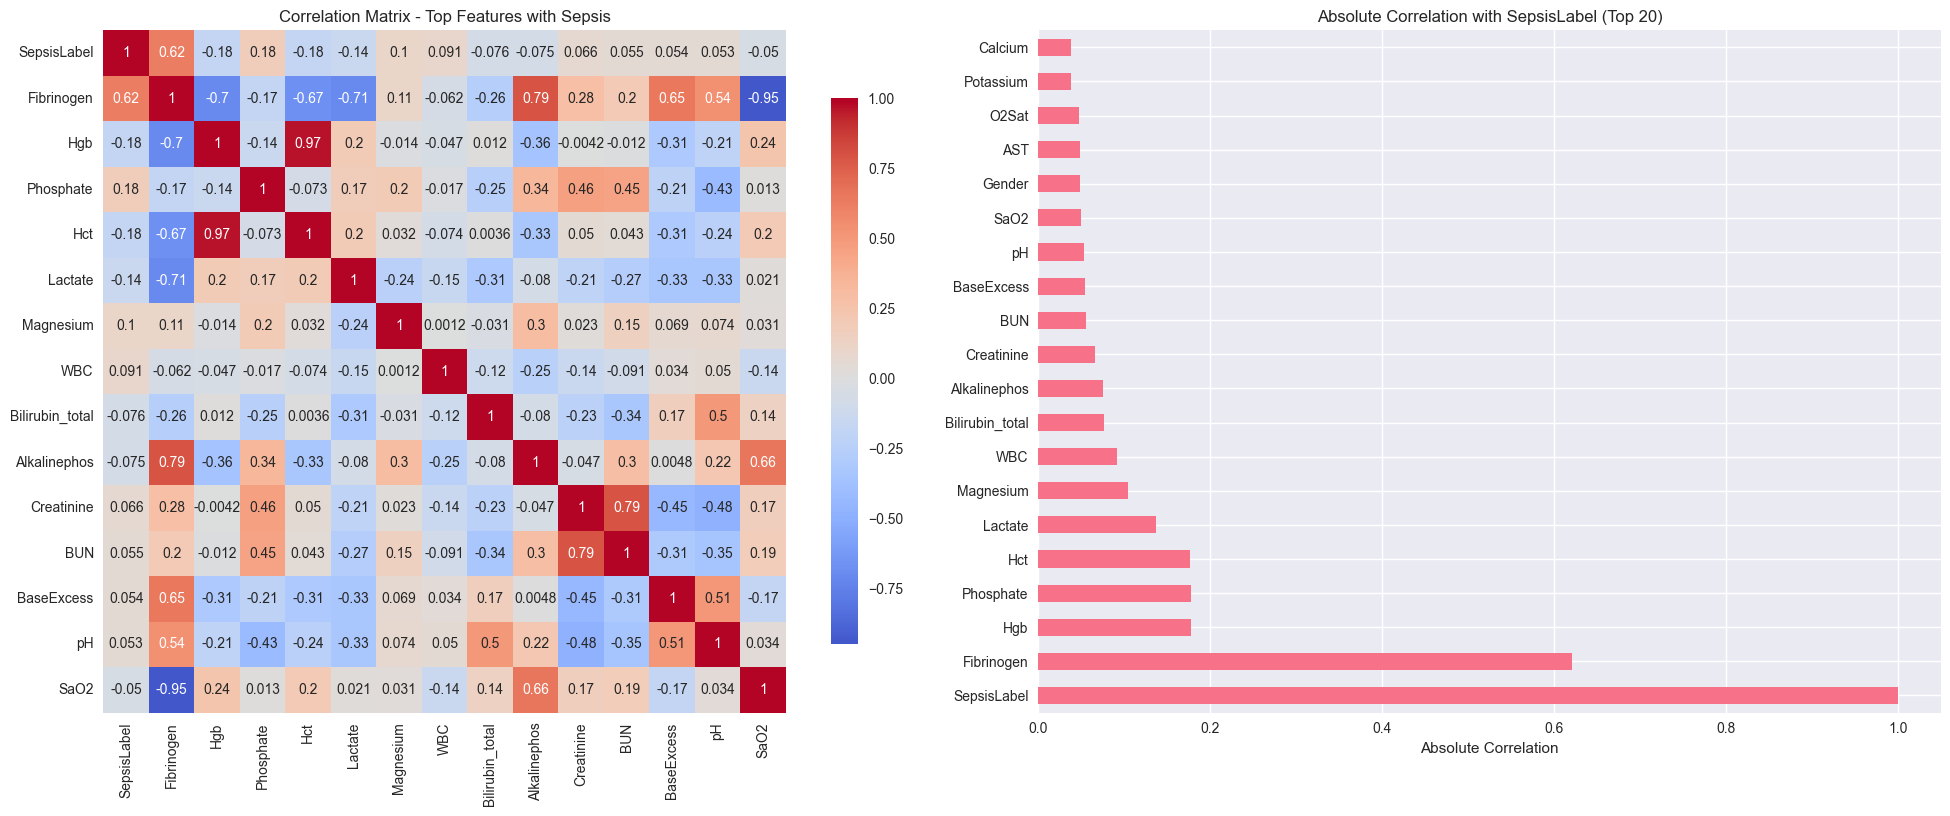

In [16]:
# Visualize correlations
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top correlations with sepsis
top_corr_features = sepsis_correlation.head(15).index.tolist()
corr_subset = combined_data[top_corr_features].corr()

sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0], cbar_kws={'shrink': 0.8})
axes[0].set_title('Correlation Matrix - Top Features with Sepsis')

# Sepsis correlation bar plot
sepsis_corr_plot = sepsis_correlation.head(20)
sepsis_corr_plot.plot(kind='barh', ax=axes[1])
axes[1].set_title('Absolute Correlation with SepsisLabel (Top 20)')
axes[1].set_xlabel('Absolute Correlation')

plt.tight_layout()
plt.show()

In [17]:
# Data quality assessment
print("=== DATA QUALITY ASSESSMENT ===")

# Check for duplicate rows
duplicates = combined_data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check for constant features
constant_features = []
for col in combined_data.columns:
    if combined_data[col].nunique() <= 1:
        constant_features.append(col)

print(f"Constant features: {constant_features}")

# Check for extreme outliers using IQR method
outlier_summary = []
for col in numerical_features:
    if col in combined_data.columns:
        data = combined_data[col].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR
            
            outliers = ((data < lower_bound) | (data > upper_bound)).sum()
            outlier_pct = outliers / len(data) * 100
            
            if outliers > 0:
                outlier_summary.append({
                    'Feature': col,
                    'Outliers': outliers,
                    'Outlier_Pct': outlier_pct,
                    'Lower_Bound': lower_bound,
                    'Upper_Bound': upper_bound
                })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Pct', ascending=False)
print(f"\nFeatures with outliers (>3 IQR):")
display(outlier_df.head(10))

=== DATA QUALITY ASSESSMENT ===
Duplicate rows: 0
Constant features: ['EtCO2']

Features with outliers (>3 IQR):


,Feature,Outliers,Outlier_Pct,Lower_Bound,Upper_Bound
17,Bilirubin_total,7,14.285714,-2.2,4.1
10,AST,9,14.285714,-243.5,376.0
9,SaO2,20,13.605442,78.0,113.0
6,FiO2,58,12.184874,0.1,0.8
13,Creatinine,29,11.026616,-1.2,3.0
12,Alkalinephos,4,6.779661,-111.5,312.0
19,Fibrinogen,1,4.000000,-264.0,779.0
21,SepsisLabel,135,3.644708,0.0,0.0
11,BUN,10,3.205128,-37.0,75.0
18,PTT,4,2.380952,-10.2,73.8


## 🎯 Sepsis vs Non-Sepsis Comparative Analysis

Deep dive into the differences between sepsis and non-sepsis patients to identify discriminative features and clinical patterns.

In [18]:
# Summary and next steps
print("=== EXPLORATION SUMMARY ===")
print(f"""Dataset Characteristics:
- Total samples: {len(combined_data):,} hourly measurements
- Unique patients: {combined_data['PatientID'].nunique()}
- Features: {len(combined_data.columns)} total features
- Target distribution: {sepsis_percent[0]:.1f}% no sepsis, {sepsis_percent[1]:.1f}% sepsis
- Missing data: Significant missingness in lab values (typical for medical data)
- Data quality: {duplicates} duplicates, {len(constant_features)} constant features

Key Findings:
1. Highly imbalanced dataset - sepsis cases are rare
2. Temporal nature - time series data with varying length per patient
3. Missing data patterns - lab values more sparse than vital signs
4. Clinical relevance - features align with sepsis pathophysiology

Next Steps for Preprocessing:
1. Handle missing values with medical domain knowledge
2. Feature engineering for temporal patterns
3. Address class imbalance with SMOTE
4. Apply STFT for frequency domain analysis
5. Prepare data for ensemble modeling
""")

# Save exploration results
exploration_results = {
    'dataset_shape': combined_data.shape,
    'unique_patients': combined_data['PatientID'].nunique(),
    'sepsis_distribution': sepsis_counts.to_dict(),
    'missing_data': missing_df.to_dict(),
    'vital_signs_stats': combined_data[vital_signs].describe().to_dict(),
    'top_sepsis_correlations': sepsis_correlation.head(10).to_dict()
}

print("\nExploration completed successfully!")
print("Data ready for preprocessing pipeline.")

=== EXPLORATION SUMMARY ===
Dataset Characteristics:
- Total samples: 3,704 hourly measurements
- Unique patients: 100
- Features: 42 total features
- Target distribution: 96.4% no sepsis, 3.6% sepsis
- Missing data: Significant missingness in lab values (typical for medical data)
- Data quality: 0 duplicates, 1 constant features

Key Findings:
1. Highly imbalanced dataset - sepsis cases are rare
2. Temporal nature - time series data with varying length per patient
3. Missing data patterns - lab values more sparse than vital signs
4. Clinical relevance - features align with sepsis pathophysiology

Next Steps for Preprocessing:
1. Handle missing values with medical domain knowledge
2. Feature engineering for temporal patterns
3. Address class imbalance with SMOTE
4. Apply STFT for frequency domain analysis
5. Prepare data for ensemble modeling


Exploration completed successfully!
Data ready for preprocessing pipeline.


## 📋 Summary and Key Insights

### 🔑 Key Findings
- **Data Quality**: Assessment of missing values and data completeness
- **Clinical Patterns**: Identified sepsis-related biomarker trends
- **Feature Importance**: Most discriminative variables for prediction
- **Temporal Dynamics**: Time-series patterns in sepsis development

### 📊 Recommendations for Next Steps
1. **Feature Engineering**: Focus on temporal trends and ratios
2. **Missing Value Handling**: Implement clinical-informed imputation
3. **Feature Selection**: Prioritize highly discriminative variables
4. **Model Selection**: Consider time-series aware algorithms

### 🎯 Clinical Insights
- Early sepsis indicators and warning signs
- Critical time windows for intervention
- Patient subgroup variations
- Risk factor combinations